# Cluster Analysis - 미국 전력 회사 데이터셋 기반 실습

### K-means
### Elbow method : inertia
### Silhouette method 

> 참고 서적: (c) 2019 Galit Shmueli, Peter C. Bruce, Peter Gedeck 
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition) 
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.

##  필요한 라이브러리 임포트

In [5]:
from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

import dmba

%matplotlib inline


## 데이터 가져오기
Load the data, set row names (index) to the utilities column (company) and remove it. Convert all columns to `float`

In [6]:
#  데이터셋 가져오기
utilities_df = pd.read_csv('https://raw.githubusercontent.com/bjpark-forest/2023-1-Intro_ML/main/KMeans/Utilities.csv')
utilities_df.set_index('Company', inplace=True)

# 정수형 데이터를 실수형 데이터로 변환하기
utilities_df = utilities_df.apply(lambda x: x.astype('float64'))
utilities_df

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Company,,,,,,,,
Arizona,1.06,9.2,151.0,54.4,1.6,9077.0,0.0,0.628
Boston,0.89,10.3,202.0,57.9,2.2,5088.0,25.3,1.555
Central,1.43,15.4,113.0,53.0,3.4,9212.0,0.0,1.058
Commonwealth,1.02,11.2,168.0,56.0,0.3,6423.0,34.3,0.700
NY,1.49,8.8,192.0,51.2,1.0,3300.0,15.6,2.044
Florida,1.32,13.5,111.0,60.0,-2.2,11127.0,22.5,1.241
Hawaiian,1.22,12.2,175.0,67.6,2.2,7642.0,0.0,1.652
Idaho,1.10,9.2,245.0,57.0,3.3,13082.0,0.0,0.309
Kentucky,1.34,13.0,168.0,60.4,7.2,8406.0,0.0,0.862


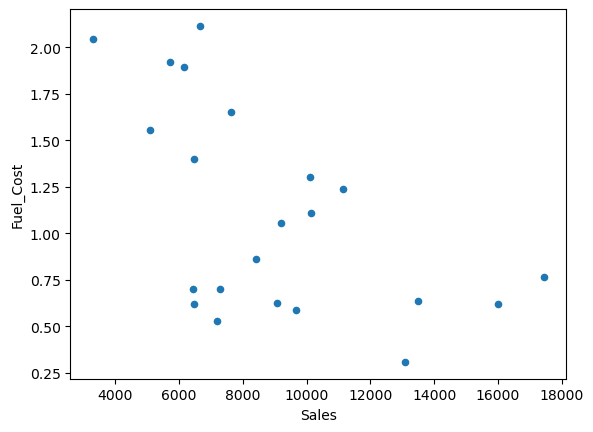

In [7]:
# 연료비와 매출액 산점도
utilities_df.plot(x='Sales', y='Fuel_Cost', kind='scatter' );

In [8]:
# 두 샘플 간의 유클리디안 거리를 계산
d = pairwise.pairwise_distances(utilities_df, metric='euclidean')
pd.DataFrame(d, columns=utilities_df.index, index=utilities_df.index).head(5)

Company,Arizona,Boston,Central,Commonwealth,NY,Florida,Hawaiian,Idaho,Kentucky,Madison,...,Northern,Oklahoma,Pacific,Puget,San Diego,Southern,Texas,Wisconsin,United,Virginia
Company,,,,,,,,,,,,,,,,,,,,,
Arizona,0.000000,3989.408076,140.402855,2654.277632,5777.167672,2050.529440,1435.265019,4006.104187,671.276346,2622.699002,...,1899.279821,598.556633,2609.045363,6914.742065,3363.061626,1063.009074,4430.251585,1790.485648,2427.588875,1016.617691
Boston,3989.408076,0.000000,4125.044132,1335.466502,1788.068027,6039.689076,2554.287162,7994.155985,3318.276558,1367.090634,...,2091.160485,4586.302564,1380.749962,10903.146464,629.760748,5052.331669,8419.610541,2199.721665,1562.210811,5005.081262
Central,140.402855,4125.044132,0.000000,2789.759674,5912.552908,1915.155154,1571.295401,3872.257626,807.920792,2758.559663,...,2035.441520,461.341670,2744.502847,6780.430307,3498.113013,928.749249,4295.014690,1925.772564,2563.637362,883.535455
Commonwealth,2654.277632,1335.466502,2789.759674,0.000000,3123.153215,4704.363099,1219.560005,6659.534567,1983.314354,43.648894,...,756.831954,3250.984589,56.644626,9568.434429,710.292965,3717.202963,7084.372839,864.273153,232.476871,3670.018191
NY,5777.167672,1788.068027,5912.552908,3123.153215,0.000000,7827.429211,4342.093798,9782.158178,5106.094153,3155.095594,...,3879.167462,6373.743249,3168.177463,12691.155108,2414.698757,6840.150291,10207.392630,3987.335962,3350.073118,6793.035300


## 데이터 정규화
정규화 공식 z = $\frac{(x - 평균)}{표준편차} $

In [9]:
# 매출액과 연료비에 대한 raw data와 정규화된 데이터
utilities_df_norm = (utilities_df - utilities_df.mean())/utilities_df.std()

pd.concat((utilities_df[["Sales", "Fuel_Cost"]], utilities_df_norm[["Sales", "Fuel_Cost"]]), axis=1)

,Sales,Fuel_Cost,Sales,Fuel_Cost
Company,,,,
Arizona,9077.0,0.628,0.045903,-0.853675
Boston,5088.0,1.555,-1.077764,0.813297
Central,9212.0,1.058,0.083931,-0.080431
Commonwealth,6423.0,0.700,-0.701706,-0.724202
NY,3300.0,2.044,-1.581428,1.692638
Florida,11127.0,1.241,0.623370,0.248648
Hawaiian,7642.0,1.652,-0.358324,0.987726
Idaho,13082.0,0.309,1.174077,-1.427315
Kentucky,8406.0,0.862,-0.143112,-0.432886


In [10]:
# 정규화된 데이터 기준으로 유클리드 거리를 계산한 결과
d_norm = pairwise.pairwise_distances(utilities_df_norm[['Sales', 'Fuel_Cost']], 
                                     metric='euclidean')
pd.DataFrame(d_norm, columns=utilities_df.index, index=utilities_df.index).head(5)

Company,Arizona,Boston,Central,Commonwealth,NY,Florida,Hawaiian,Idaho,Kentucky,Madison,...,Northern,Oklahoma,Pacific,Puget,San Diego,Southern,Texas,Wisconsin,United,Virginia
Company,,,,,,,,,,,,,,,,,,,,,
Arizona,0.000000,2.010329,0.774179,0.758738,3.021907,1.244422,1.885248,1.265638,0.461292,0.738650,...,0.564657,0.182648,1.570780,1.947668,2.509043,0.913621,1.247976,0.521491,2.761745,1.252350
Boston,2.010329,0.000000,1.465703,1.582821,1.013370,1.792397,0.740283,3.176654,1.557738,1.719632,...,1.940166,2.166078,0.478334,3.501390,0.679634,1.634425,2.890560,1.654255,1.100595,1.479261
Central,0.774179,1.465703,0.000000,1.015710,2.432528,0.631892,1.156092,1.732777,0.419254,1.102287,...,1.113433,0.855093,0.987772,2.065643,1.836762,0.276440,1.428159,0.838967,2.034824,0.510365
Commonwealth,0.758738,1.582821,1.015710,0.000000,2.571969,1.643857,1.746027,2.003230,0.629994,0.138758,...,0.377004,0.937389,1.258835,2.699060,2.202930,1.278514,1.998818,0.243408,2.547116,1.502093
NY,3.021907,1.013370,2.432528,2.571969,0.000000,2.635573,1.411695,4.162561,2.566439,2.705445,...,2.938637,3.174588,1.462019,4.397433,0.715629,2.558409,3.831132,2.661786,0.952507,2.328691


## 덴드로그램 그리기


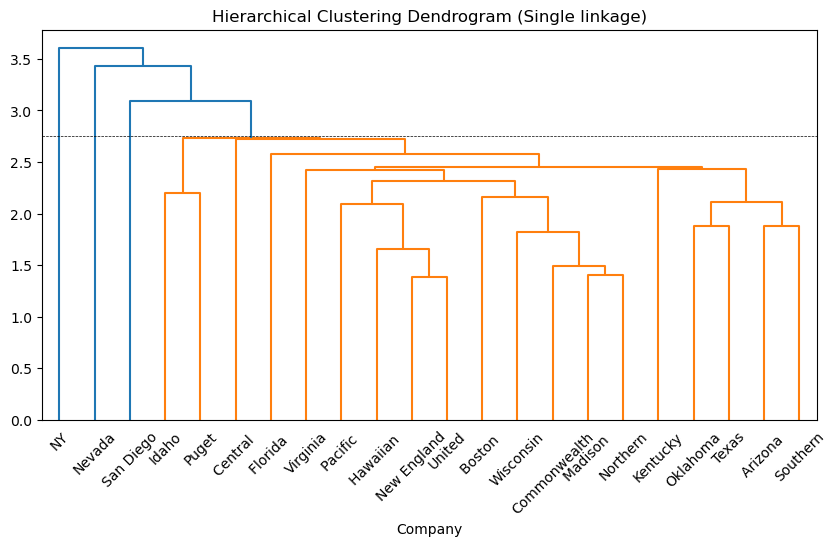

In [11]:
Z = linkage(utilities_df_norm, method='single')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
plt.xlabel('Company')
dendrogram(Z, labels=utilities_df_norm.index, color_threshold=2.75)
plt.axhline(y=2.75, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

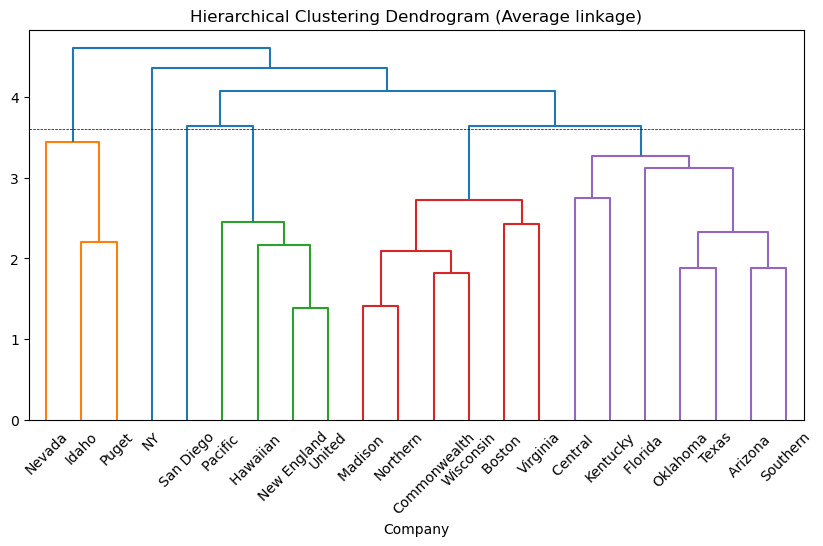

In [12]:
Z = linkage(utilities_df_norm, method='average')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Average linkage)')
plt.xlabel('Company')
dendrogram(Z, labels=utilities_df_norm.index, color_threshold=3.6)
plt.axhline(y=3.6, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

## 6개의 군집으로 나누어 각 군집에 속한 전력회사 이름 표시하기

In [13]:
memb = fcluster(linkage(utilities_df_norm, 'single'), 6, criterion='maxclust')
memb = pd.Series(memb, index=utilities_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  Idaho, Puget
2 :  Arizona , Boston , Commonwealth, Florida , Hawaiian , Kentucky, Madison , New England, Northern, Oklahoma, Pacific , Southern, Texas, Wisconsin, United, Virginia
3 :  Central 
4 :  San Diego
5 :  Nevada
6 :  NY


In [14]:
memb = fcluster(linkage(utilities_df_norm, 'average'), 6, criterion='maxclust')
memb = pd.Series(memb, index=utilities_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  Idaho, Nevada, Puget
2 :  Hawaiian , New England, Pacific , United
3 :  San Diego
4 :  Boston , Commonwealth, Madison , Northern, Wisconsin, Virginia
5 :  Arizona , Central , Florida , Kentucky, Oklahoma, Southern, Texas
6 :  NY


## 개별 군집이 가지는 특성 확인하기

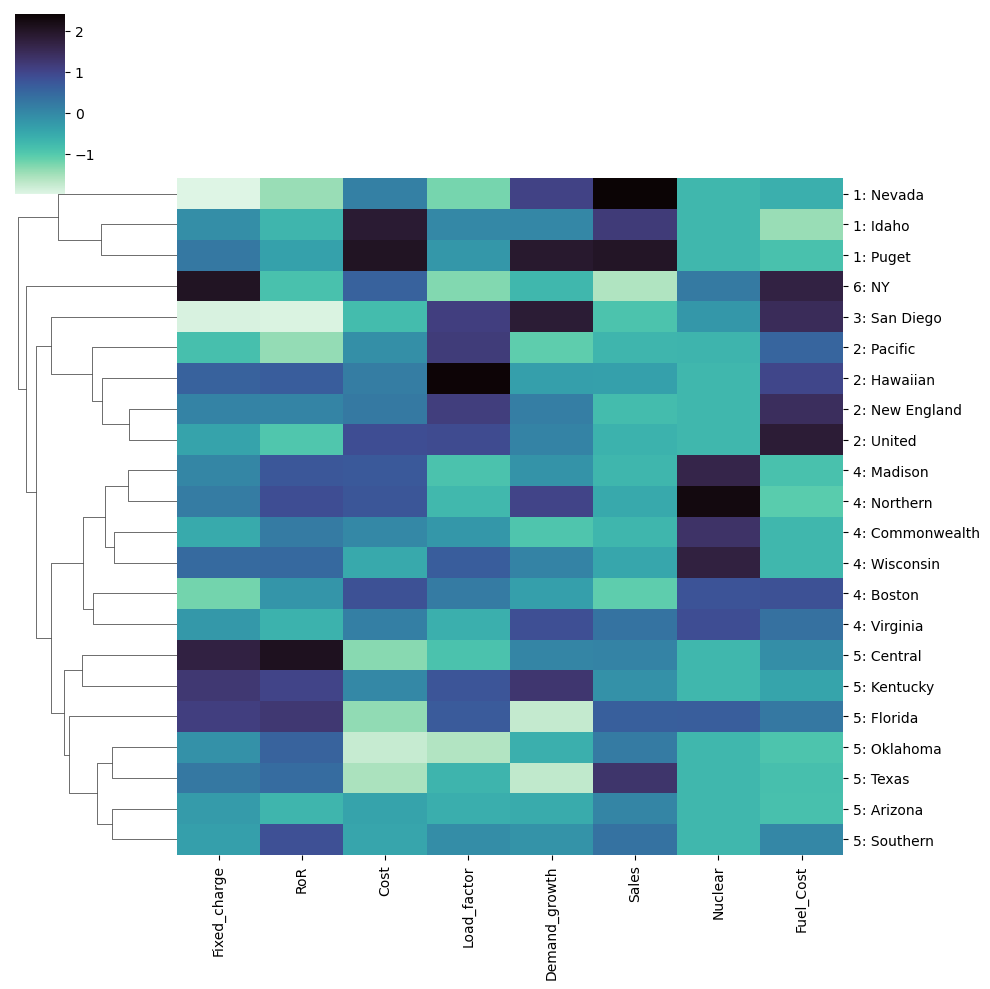

In [15]:
utilities_df_norm.index = ['{}: {}'.format(cluster, state) for cluster, state in zip(memb, utilities_df_norm.index)]
sns.clustermap(utilities_df_norm, method='average', col_cluster=False,  cmap="mako_r")
plt.show()

## K-Means로 군집 수행하기

In [16]:
# Load and preprocess data
utilities_df = dmba.load_data('Utilities.csv')
utilities_df.set_index('Company', inplace=True)
utilities_df = utilities_df.apply(lambda x: x.astype('float64'))

# Normalized distance
utilities_df_norm = utilities_df.apply(preprocessing.scale, axis=0)

kmeans = KMeans(n_clusters=6, random_state=0).fit(utilities_df_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=utilities_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  Commonwealth, Madison , Northern, Wisconsin, Virginia
1 :  Boston , Hawaiian , New England, Pacific , San Diego, United
2 :  Arizona , Central , Florida , Kentucky, Oklahoma, Southern, Texas
3 :  NY
4 :  Nevada
5 :  Idaho, Puget


/Users/bongjupark/miniconda3/envs/tf2/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
